In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
vdata=pd.read_csv('Videos_data.csv')
vdata.head()

,Unnamed: 0,Video Id,Title,Description,Category
0,0,iQeeqEeAK08,How I Became a TRAVEL VLOGGER | Make Money Eve...,"In this video, I share with you my tips on how...",travel
1,1,i9E_Blai8vk,Welcome to Bali | Travel Vlog | Priscilla Lee,DISCLAIMER* Please do not ride elephants when ...,travel
2,2,gtm2O_6_mUM,SIKKIM TRAVEL VLOG | Bagdogra to Gangtok - Vlo...,Hey everyone! I recently went on a trip to Sik...,travel
3,3,v6eh9zOqDnQ,Top 10 Travel Vloggers,"For this list, we're taking a look at YouTuber...",travel
4,4,BbegGNcvMb0,Travelling to Italy after Lockdown | Dhruv Rat...,Welcome to my First Vlog. Here I share with yo...,travel


In [7]:
vdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3468 non-null   int64 
 1   Video Id     3468 non-null   object
 2   Title        3468 non-null   object
 3   Description  3468 non-null   object
 4   Category     3468 non-null   object
dtypes: int64(1), object(4)
memory usage: 135.6+ KB


In [4]:
vdata.isnull().sum()

Unnamed: 0      0
Video Id        0
Title           0
Description    74
Category        0
dtype: int64

In [5]:
vdata['Description']=vdata['Description'].fillna(' ')

In [6]:
vdata.isnull().sum()

Unnamed: 0     0
Video Id       0
Title          0
Description    0
Category       0
dtype: int64

In [3]:
vdata['Category'].value_counts()

food                      598
science and technology    589
history                   589
manufacturing             583
travel                    578
art and music             531
Name: Category, dtype: int64

In [3]:
vdata.isnull().sum()

Unnamed: 0      0
Video Id        0
Title           0
Description    74
Category        0
dtype: int64

In [4]:
vdata['Description']=vdata['Description'].fillna(' ')

In [8]:
from langdetect import detect

In [9]:
vdata['language']=0

In [10]:
count=0
for i in range(0,len(vdata)):
    temp=vdata['Title'].iloc[i]
    count+=1
    try:
        vdata['language'].iloc[i]=detect(temp)
    except:
        vdata['language'].iloc[i]='error'

C:\Users\patel\Anaconda3\envs\Project\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
a=vdata[vdata['language']=='en']
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3045 entries, 0 to 3467
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3045 non-null   int64 
 1   Video Id     3045 non-null   object
 2   Title        3045 non-null   object
 3   Description  3045 non-null   object
 4   Category     3045 non-null   object
 5   language     3045 non-null   object
dtypes: int64(1), object(5)
memory usage: 166.5+ KB


<AxesSubplot:>

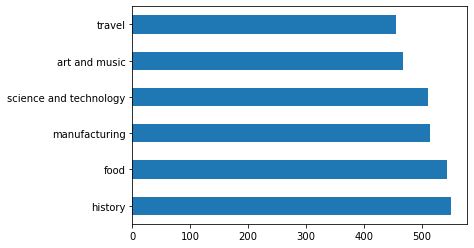

In [15]:
import matplotlib.pyplot as plt
a['Category'].value_counts().plot(kind='barh')

In [16]:
# Change to lowercase
vdata['Title'] = vdata['Title'].map(lambda x: x.lower())
vdata['Description'] = vdata['Description'].map(lambda x: x.lower())

# Remove numbers
vdata['Title'] = vdata['Title'].map(lambda x: re.sub(r'\d+', '', x))
vdata['Description'] = vdata['Description'].map(lambda x: re.sub(r'\d+', '', x))

# Remove Punctuation
vdata['Title']  = vdata['Title'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
vdata['Description']  = vdata['Description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# Remove white spaces
vdata['Title'] = vdata['Title'].map(lambda x: x.strip())
vdata['Description'] = vdata['Description'].map(lambda x: x.strip())

# Tokenize into words
vdata['Title'] = vdata['Title'].map(lambda x: word_tokenize(x))
vdata['Description'] = vdata['Description'].map(lambda x: word_tokenize(x))
 
# Remove non alphabetic tokens
vdata['Title'] = vdata['Title'].map(lambda x: [word for word in x if word.isalpha()])
vdata['Description'] = vdata['Description'].map(lambda x: [word for word in x if word.isalpha()])

# filter out stop words
stop_words = set(stopwords.words('english'))
vdata['Title'] = vdata['Title'].map(lambda x: [w for w in x if not w in stop_words])
vdata['Description'] = vdata['Description'].map(lambda x: [w for w in x if not w in stop_words])

# Word Lemmatization
lem = WordNetLemmatizer()
vdata['Title'] = vdata['Title'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
vdata['Description'] = vdata['Description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

# Turn lists back to string
vdata['Title'] = vdata['Title'].map(lambda x: ' '.join(x))
vdata['Description'] = vdata['Description'].map(lambda x: ' '.join(x))

In [17]:
vdata.head()

,Unnamed: 0,Video Id,Title,Description,Category,language
0,0,iQeeqEeAK08,become travel vlogger make money even youre st...,video share tip become travel blogger make mon...,travel,en
1,1,i9E_Blai8vk,welcome bali travel vlog priscilla lee,disclaimer please ride elephants visit country...,travel,it
2,2,gtm2O_6_mUM,sikkim travel vlog bagdogra gangtok vlog north...,hey everyone recently go trip sikkim friend sh...,travel,en
3,3,v6eh9zOqDnQ,top travel vloggers,list take look youtubers travel globe make us ...,travel,no
4,4,BbegGNcvMb0,travel italy lockdown dhruv rathee vlog,welcome first vlog share journey italy lockdow...,travel,en


In [18]:
videoCategory=[]
for index, row in vdata.iterrows():
    category=vdata['Category']
    
    for i in category:
        if i not in videoCategory:
            videoCategory.append(i)
videoCategory[:10]

['travel',
 'science and technology',
 'food',
 'manufacturing',
 'history',
 'art and music']

In [19]:
def binary(category_list):
    binaryList = []
    
    for i in videoCategory:
        if i in category_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [20]:
vdata['category_bins']=vdata['Category'].apply(lambda x:binary(x))
vdata['category_bins'].head()

0    [1, 0, 0, 0, 0, 0]
1    [1, 0, 0, 0, 0, 0]
2    [1, 0, 0, 0, 0, 0]
3    [1, 0, 0, 0, 0, 0]
4    [1, 0, 0, 0, 0, 0]
Name: category_bins, dtype: object

In [21]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

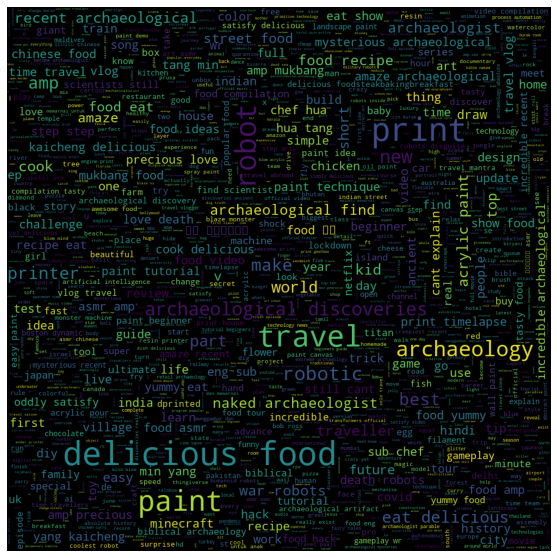

In [22]:
plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))

words=vdata['Title'].dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [23]:
words_list = []
for index, row in vdata.iterrows():
    words=vdata['Title'] 
    
    for i in words:
        if i not in words_list:
            words_list.append(i)

In [24]:
def binary(words):
    binaryList = []
    for i in words_list:
        if i in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [25]:
vdata['word_bins']=vdata['Title'].apply(lambda x:binary(x))
vdata['word_bins'].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: word_bins, dtype: object

In [26]:
new_id = list(range(0,vdata.shape[0]))
vdata['new_id']=new_id
vdata=vdata[['Video Id','Title','new_id','Description', 'Category','category_bins','word_bins']]
vdata.head()

,Video Id,Title,new_id,Description,Category,category_bins,word_bins
0,iQeeqEeAK08,become travel vlogger make money even youre st...,0,video share tip become travel blogger make mon...,travel,"[1, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,i9E_Blai8vk,welcome bali travel vlog priscilla lee,1,disclaimer please ride elephants visit country...,travel,"[1, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,gtm2O_6_mUM,sikkim travel vlog bagdogra gangtok vlog north...,2,hey everyone recently go trip sikkim friend sh...,travel,"[1, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,v6eh9zOqDnQ,top travel vloggers,3,list take look youtubers travel globe make us ...,travel,"[1, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,BbegGNcvMb0,travel italy lockdown dhruv rathee vlog,4,welcome first vlog share journey italy lockdow...,travel,"[1, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [27]:
from scipy import spatial

def Similarity(Title1,Title2):
    a = vdata.iloc[Title1]
    b = vdata.iloc[Title2]
    CategoryA = a['category_bins']
    CategoryB = b['category_bins']
    CategoryDistance = spatial.distance.cosine(CategoryA,CategoryB)    
    wordsA = a['word_bins']
    wordsB = b['word_bins']
    wordsDistance = spatial.distance.cosine(wordsA,wordsB)
    return CategoryDistance+wordsDistance

In [28]:
Similarity(4,1000)

2.0

In [18]:
vdata.iloc[4]

Video Id                                               BbegGNcvMb0
Title                      travel italy lockdown dhruv rathee vlog
new_id                                                           4
Description      welcome first vlog share journey italy lockdow...
Category                                                    travel
category_bins                                   [1, 0, 0, 0, 0, 0]
word_bins        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 4, dtype: object

In [19]:
vdata.iloc[1000]

Video Id                                               sE_4f5TQ3Ds
Title            fruit vs robots crazy robot assistant pear couple
new_id                                                        1000
Description      liza find new assistant home sparkle clean any...
Category                                    science and technology
category_bins                                   [0, 1, 0, 0, 0, 0]
word_bins        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 1000, dtype: object

In [29]:
import operator

def recommend(name):
    new_video = vdata[vdata['Title'].str.contains(name)].iloc[0]
    print('Selected Video: ',new_video.Title)
    def getNeighbors(baseVideo, K):
        distances = []
    
        for index, video in vdata.iterrows():
            if video['new_id'] != baseVideo['new_id']:
                dist = Similarity(baseVideo['new_id'], video['new_id'])
                distances.append((video['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    neighbors = getNeighbors(new_video, K)
    print('\nRecommended Videos: \n')
    for neighbor in neighbors: 
        print( vdata.iloc[neighbor[0]][1])

In [37]:
recommend('money')

Selected Video:  become travel vlogger make money even youre start youtuber

Recommended Videos: 

travel vlog
welcome bali travel vlog priscilla lee
sikkim travel vlog bagdogra gangtok vlog north east india kritika goel
top travel vloggers
travel vlog santorini greece
german try indian food hamburg travel vlog indian german friends trip friends reunion
indians go pattaya thailand travel vlog indian
roadtrip chandigarh manali roadtrip manali himachal travel vlog
finland vacation travel vlog
aur hum pahonch gaye goa nita shilimkar travel vlog
